In [2]:
# Linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df=pd.read_csv("satf.csv")
df

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
...,...,...,...,...,...
100,3.76,605,590,3.74,3.64
101,3.49,692,683,3.27,3.42
102,3.07,680,692,3.19,3.25
103,2.19,617,503,2.98,2.76


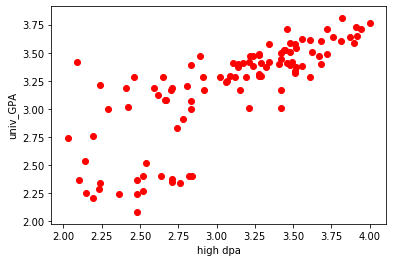

In [4]:
plt.xlabel("high dpa")
plt.ylabel("univ_GPA")
plt.scatter(df.high_GPA,df.univ_GPA,color="r")

In [39]:
reg=linear_model.LinearRegression()
reg.fit(df[['high_GPA','math_SAT']],df.univ_GPA)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.coef_

array([0.57107454, 0.00129795])

In [41]:
reg.intercept_

0.6072915620645176

In [42]:
reg.predict([[4,800]])

array([3.92995101])

In [43]:
import pickle

In [51]:
with open ('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [52]:
with open ('model_pickle','rb') as f:
    mp = pickle.load(f)

In [53]:
from sklearn.externals import joblib

In [54]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [55]:
mj=joblib.load('model_joblib')

In [56]:
mj.coef_

array([0.57107454, 0.00129795])

In [57]:
mj.predict([[4,850]])

array([3.99484859])

# training & test data

In [58]:
df

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
...,...,...,...,...,...
100,3.76,605,590,3.74,3.64
101,3.49,692,683,3.27,3.42
102,3.07,680,692,3.19,3.25
103,2.19,617,503,2.98,2.76


In [59]:
x=df[['high_GPA','math_SAT','verb_SAT']]
y=df[['comp_GPA','univ_GPA']]

In [60]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [70]:
X_train

,high_GPA,math_SAT,verb_SAT
96,2.76,564,549
68,3.29,692,563
38,2.29,573,591
52,2.74,583,510
74,3.48,692,698
...,...,...,...
28,3.34,683,648
64,3.94,691,645
15,3.68,683,642
100,3.76,605,590


In [71]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
reg.predict(X_test)

array([[3.30990013, 3.34261002],
       [2.77794628, 2.87858649],
       [3.17511983, 3.20737659],
       [2.80357063, 2.86241344],
       [3.48846458, 3.49123346],
       [2.98296744, 3.05442533],
       [3.3686437 , 3.38206256],
       [2.75567907, 2.83087251],
       [3.56478333, 3.5212885 ],
       [3.47986854, 3.51725864],
       [2.66813726, 2.74539068],
       [2.75768922, 2.8466679 ],
       [2.84168954, 2.93694008],
       [3.41717743, 3.43119077],
       [2.76622262, 2.85837449],
       [2.62027525, 2.73563922],
       [2.63631871, 2.76222399],
       [2.78905112, 2.87456751],
       [3.28522291, 3.34710943],
       [3.31926437, 3.31889681],
       [3.64196361, 3.631918  ]])

In [73]:
reg.score(X_test,y_test)

F:\anaconda\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5733847674908437

# Logistic regression

In [74]:
model=pd.read_csv("heart.csv")
model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [96]:
X=model[["age","sex","cp",'trestbps','fbs']]
Y=model[['target']]

In [97]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [99]:
clf.fit(X_train,y_train)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
clf.score(X_test,y_test)

0.7213114754098361

In [101]:
clf.predict([[50,1,1,150,1]])

array([0], dtype=int64)

In [102]:
y_predict=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

Text(69.0, 0.5, 'y')

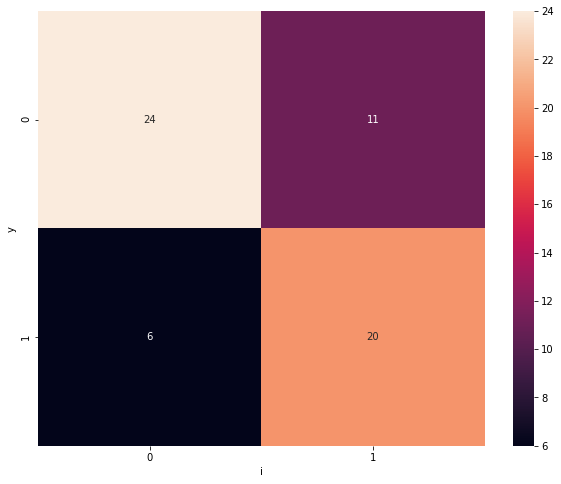

In [103]:
import seaborn as sp
plt.figure(figsize=(10,8))
sp.heatmap(cm,annot=True)
plt.xlabel("i")
plt.ylabel("y")